<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Problem 1: Creating code to determine the initial values of the weights.

In [1]:
# Problem 1: Creating code to determine the initial values of the weights.
import numpy as np

def initialize_weights(input_size, hidden_size, output_size, sigma=0.01):
    """
    Initialize weights and biases for a 3-layer neural network

    Parameters:
    input_size: int - size of input layer (784 for MNIST)
    hidden_size: int - size of hidden layer
    output_size: int - size of output layer (10 for MNIST)
    sigma: float - standard deviation for Gaussian distribution

    Returns:
    Dictionary containing initialized parameters
    """
    params = {}

    # He initialization (better for ReLU) would use np.sqrt(2./input_size) instead of sigma
    params['W1'] = sigma * np.random.randn(input_size, hidden_size)
    params['b1'] = np.zeros(hidden_size)

    params['W2'] = sigma * np.random.randn(hidden_size, output_size)
    params['b2'] = np.zeros(output_size)

    return params

# Example usage for MNIST:
params = initialize_weights(784, 400, 10, sigma=0.01)
print(f"W1 shape: {params['W1'].shape}")  # Should be (784, 400)
print(f"b1 shape: {params['b1'].shape}")  # Should be (400,)
print(f"W2 shape: {params['W2'].shape}")  # Should be (400, 10)
print(f"b2 shape: {params['b2'].shape}")  # Should be (10,)

W1 shape: (784, 400)
b1 shape: (400,)
W2 shape: (400, 10)
b2 shape: (10,)


## Key Points:

1. **Weight Initialization**:
   - Weights are initialized with small random values from a Gaussian distribution
   - The `sigma` parameter controls the scale of initial weights
   - Typical values for sigma range from 0.01 to 0.1

2. **Bias Initialization**:
   - Biases are initialized to zeros, which is common practice
   - This gives the network symmetry breaking from just the weights

3. **Why Gaussian Distribution?**:
   - Provides a good starting point for gradient descent
   - Small values prevent early saturation of sigmoid/tanh activations
   - Randomness helps break symmetry between neurons

This initialization method ensures the neural network starts with reasonable weight values that will allow for effective learning during training. The small random values help prevent neurons from learning the same features while keeping activations in a reasonable range at the start of training.

###Problem 2: Implementation of Forward Propagation



In [ ]:
import numpy as np

def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def softmax(x):
    """Softmax activation function"""
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # for numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def forward_propagation(X, params):
    """
    Perform forward propagation through a 3-layer neural network

    Parameters:
    X: Input data (batch_size, n_features)
    params: Dictionary containing weights and biases

    Returns:
    Dictionary containing all layer outputs and activations
    """
    cache = {}

    # First layer
    cache['A1'] = np.dot(X, params['W1']) + params['b1']  # (batch_size, n_nodes1)
    cache['Z1'] = sigmoid(cache['A1'])  # (batch_size, n_nodes1)

    # Second layer
    cache['A2'] = np.dot(cache['Z1'], params['W2']) + params['b2']  # (batch_size, n_nodes2)
    cache['Z2'] = sigmoid(cache['A2'])  # (batch_size, n_nodes2)

    # Output layer
    cache['A3'] = np.dot(cache['Z2'], params['W3']) + params['b3']  # (batch_size, n_output)
    cache['Z3'] = softmax(cache['A3'])  # (batch_size, n_output)

    return cache

# Example usage:
# Initialize parameters (extended for 3 layers)
def initialize_parameters(input_size=784, hidden1_size=400, hidden2_size=200, output_size=10, sigma=0.01):
    params = {}
    params['W1'] = sigma * np.random.randn(input_size, hidden1_size)
    params['b1'] = np.zeros(hidden1_size)
    params['W2'] = sigma * np.random.randn(hidden1_size, hidden2_size)
    params['b2'] = np.zeros(hidden2_size)
    params['W3'] = sigma * np.random.randn(hidden2_size, output_size)
    params['b3'] = np.zeros(output_size)
    return params

# Create sample data
batch_size = 20
n_features = 784
X_sample = np.random.randn(batch_size, n_features)

# Initialize parameters
params = initialize_parameters()

# Perform forward pass
cache = forward_propagation(X_sample, params)

# Check shapes
print("Layer outputs shapes:")
print(f"Z1 (1st layer): {cache['Z1'].shape}")  # Should be (20, 400)
print(f"Z2 (2nd layer): {cache['Z2'].shape}")  # Should be (20, 200)
print(f"Z3 (output): {cache['Z3'].shape}")     # Should be (20, 10)

# Verify probabilities sum to 1
print("\nSample output probabilities (sum to 1):")
print(cache['Z3'][0])  # First sample's class probabilities
print(f"Sum: {np.sum(cache['Z3'][0]):.2f}")  # Should be 1.00

# Implementation of Forward Propagation for 3-Layer Neural Network
## Key Components Explained:

1. **Layer Calculations**:
   - Each layer computes: `A = X.W + b`
   - Followed by activation: `Z = activation(A)`

2. **Activation Functions**:
   - Hidden layers use sigmoid: `1 / (1 + exp(-x))`
   - Output layer uses softmax for multi-class classification

3. **Dimensionality**:
   - Input: `(batch_size, n_features)`
   - First layer: `(batch_size, n_nodes1)`
   - Second layer: `(batch_size, n_nodes2)`
   - Output: `(batch_size, n_output)`

4. **Numerical Stability**:
   - Softmax includes `-np.max(x)` term to prevent overflow
   - Small weight initialization (sigma=0.01) prevents early saturation

5. **Output Interpretation**:
   - Final output `Z3` contains probabilities for each class (sum to 1 per sample)
   - Each row represents one sample's class probabilities

This implementation provides a complete forward pass through a 3-layer neural network, maintaining proper dimensional transformations at each layer and producing valid probability distributions at the output.

###Activation function (forward propagation)

In [2]:
import numpy as np

class Activation:
    """
    Activation functions for neural networks
    """

    @staticmethod
    def sigmoid(A):
        """
        Sigmoid activation function
        f(A) = 1 / (1 + exp(-A))

        Parameters:
        A: Input array (any shape)

        Returns:
        Activated output (same shape as input)
        """
        return 1 / (1 + np.exp(-A))

    @staticmethod
    def tanh(A):
        """
        Hyperbolic tangent activation function
        f(A) = tanh(A) = (exp(A) - exp(-A)) / (exp(A) + exp(-A))

        Parameters:
        A: Input array (any shape)

        Returns:
        Activated output (same shape as input)
        """
        return np.tanh(A)

    @staticmethod
    def apply(A, activation_type='sigmoid'):
        """
        Apply specified activation function

        Parameters:
        A: Input array
        activation_type: 'sigmoid' or 'tanh'

        Returns:
        Activated output
        """
        if activation_type == 'sigmoid':
            return Activation.sigmoid(A)
        elif activation_type == 'tanh':
            return Activation.tanh(A)
        else:
            raise ValueError(f"Unknown activation type: {activation_type}")

# Example usage in forward propagation
def forward_propagation(X, params, hidden_activation='sigmoid'):
    """
    3-layer neural network forward propagation with selectable activation

    Parameters:
    X: Input data (batch_size, n_features)
    params: Dictionary of weights and biases
    hidden_activation: 'sigmoid' or 'tanh' for hidden layers

    Returns:
    cache: Dictionary containing layer outputs
    """
    cache = {}

    # First layer
    cache['A1'] = np.dot(X, params['W1']) + params['b1']
    cache['Z1'] = Activation.apply(cache['A1'], hidden_activation)

    # Second layer
    cache['A2'] = np.dot(cache['Z1'], params['W2']) + params['b2']
    cache['Z2'] = Activation.apply(cache['A2'], hidden_activation)

    # Output layer (always softmax for classification)
    cache['A3'] = np.dot(cache['Z2'], params['W3']) + params['b3']
    cache['Z3'] = softmax(cache['A3'])

    return cache

# Supporting softmax function
def softmax(A):
    """Softmax activation for output layer"""
    exp_A = np.exp(A - np.max(A, axis=1, keepdims=True))  # Numerical stability
    return exp_A / np.sum(exp_A, axis=1, keepdims=True)

# Example usage
if __name__ == "__main__":
    # Initialize sample data and parameters
    batch_size = 5
    n_features = 784
    X_sample = np.random.randn(batch_size, n_features)

    params = {
        'W1': np.random.randn(n_features, 400) * 0.01,
        'b1': np.zeros(400),
        'W2': np.random.randn(400, 200) * 0.01,
        'b2': np.zeros(200),
        'W3': np.random.randn(200, 10) * 0.01,
        'b3': np.zeros(10)
    }

    # Forward pass with sigmoid activation
    cache_sigmoid = forward_propagation(X_sample, params, 'sigmoid')
    print("Sigmoid activation first layer output (sample):")
    print(cache_sigmoid['Z1'][0, :5])  # First sample, first 5 nodes

    # Forward pass with tanh activation
    cache_tanh = forward_propagation(X_sample, params, 'tanh')
    print("\nTanh activation first layer output (sample):")
    print(cache_tanh['Z1'][0, :5])  # First sample, first 5 nodes

Sigmoid activation first layer output (sample):
[0.47352791 0.51449687 0.5686182  0.54011891 0.39324675]

Tanh activation first layer output (sample):
[-0.10559236  0.05793879  0.26939897  0.15944908 -0.40839625]


### Key Features:

1. **Activation Function Options**:
   - **Sigmoid**: Output range (0, 1)
     ```python
     def sigmoid(A):
         return 1 / (1 + np.exp(-A))
     ```
   - **Tanh**: Output range (-1, 1)
     ```python
     def tanh(A):
         return np.tanh(A)  # Built-in NumPy function
     ```

2. **Flexible Forward Propagation**:
   - Can switch between activation functions via parameter
   - Output layer always uses softmax for classification
   - Maintains numerical stability with max subtraction in softmax

3. **Implementation Notes**:
   - Both activations are implemented as static methods for easy reuse
   - Includes input validation for activation type
   - Handles batches of inputs (matrix operations)

4. **Example Output**:
   ```
  Sigmoid activation first layer output (sample):
  [0.47352791 0.51449687 0.5686182  0.54011891 0.39324675]

  Tanh activation first layer output (sample):
  [-0.10559236  0.05793879  0.26939897  0.15944908 -0.40839625]
   ```

This implementation provides a clean, modular way to incorporate different activation functions in the neural network while maintaining proper dimensional transformations through each layer.

### Softmax function[link text](https://)

In [3]:
import numpy as np

def softmax(A):
    """
    Softmax activation function for multi-class classification
    Z_k = exp(A_k) / sum(exp(A_i)) for all classes i

    Parameters:
    A: Input from final layer (batch_size, n_classes)

    Returns:
    Probability distribution over classes (batch_size, n_classes)
    """
    # Numerical stability improvement: subtract max from each sample
    exp_A = np.exp(A - np.max(A, axis=1, keepdims=True))
    return exp_A / np.sum(exp_A, axis=1, keepdims=True)

# Example usage in forward propagation
def forward_propagation(X, params):
    """
    3-layer neural network forward propagation with softmax output

    Parameters:
    X: Input data (batch_size, n_features)
    params: Dictionary of weights and biases

    Returns:
    cache: Dictionary containing layer outputs and activations
    """
    cache = {}

    # First layer (sigmoid activation)
    cache['A1'] = np.dot(X, params['W1']) + params['b1']
    cache['Z1'] = 1 / (1 + np.exp(-cache['A1']))  # Sigmoid

    # Second layer (sigmoid activation)
    cache['A2'] = np.dot(cache['Z1'], params['W2']) + params['b2']
    cache['Z2'] = 1 / (1 + np.exp(-cache['A2']))  # Sigmoid

    # Output layer (softmax activation)
    cache['A3'] = np.dot(cache['Z2'], params['W3']) + params['b3']
    cache['Z3'] = softmax(cache['A3'])  # Softmax

    return cache

# Example usage
if __name__ == "__main__":
    # Initialize sample parameters (for MNIST example)
    batch_size = 3
    n_features = 784
    n_classes = 10

    # Create random input and parameters
    X_sample = np.random.randn(batch_size, n_features)
    params = {
        'W1': np.random.randn(n_features, 400) * 0.01,
        'b1': np.zeros(400),
        'W2': np.random.randn(400, 200) * 0.01,
        'b2': np.zeros(200),
        'W3': np.random.randn(200, n_classes) * 0.01,
        'b3': np.zeros(n_classes)
    }

    # Perform forward pass
    cache = forward_propagation(X_sample, params)

    # Examine output
    print("Softmax output (first sample):")
    print(cache['Z3'][0])
    print(f"Sum of probabilities: {np.sum(cache['Z3'][0]):.2f}")

    print("\nAll samples output:")
    print(cache['Z3'])
    print(f"Sum of each sample's probabilities: {np.sum(cache['Z3'], axis=1)}")

Softmax output (first sample):
[0.09364199 0.09898256 0.09454873 0.11424981 0.10800058 0.10303681
 0.08902574 0.10303738 0.0976826  0.0977938 ]
Sum of probabilities: 1.00

All samples output:
[[0.09364199 0.09898256 0.09454873 0.11424981 0.10800058 0.10303681
  0.08902574 0.10303738 0.0976826  0.0977938 ]
 [0.09362159 0.09902967 0.09457757 0.1142192  0.10801076 0.10298347
  0.08890944 0.10320081 0.09769279 0.09775469]
 [0.09359868 0.098926   0.09459462 0.1142511  0.10799373 0.10314601
  0.08893161 0.103097   0.09759741 0.09786385]]
Sum of each sample's probabilities: [1. 1. 1.]


### Key Features of the Implementation:

1. **Numerical Stability**:
   ```python
   exp_A = np.exp(A - np.max(A, axis=1, keepdims=True))
   ```
   - Subtracts the maximum value before exponentiation to prevent overflow
   - Maintains mathematical equivalence while being numerically stable

2. **Proper Normalization**:
   ```python
   return exp_A / np.sum(exp_A, axis=1, keepdims=True)
   ```
   - Divides each exponentiated value by the sum across classes
   - Ensures each sample's probabilities sum to exactly 1

3. **Batch Processing**:
   - Handles multiple samples simultaneously (batch processing)
   - Operates on 2D arrays of shape (batch_size, n_classes)

4. **Example Output**:
   ```
      Softmax output (first sample):
    [0.09364199 0.09898256 0.09454873 0.11424981 0.10800058 0.10303681
    0.08902574 0.10303738 0.0976826  0.0977938 ]
    Sum of probabilities: 1.00

    All samples output:
    [[0.09364199 0.09898256 0.09454873 0.11424981 0.10800058 0.10303681
      0.08902574 0.10303738 0.0976826  0.0977938 ]
    [0.09362159 0.09902967 0.09457757 0.1142192  0.10801076 0.10298347
      0.08890944 0.10320081 0.09769279 0.09775469]
    [0.09359868 0.098926   0.09459462 0.1142511  0.10799373 0.10314601
      0.08893161 0.103097   0.09759741 0.09786385]]
    Sum of each sample's probabilities: [1. 1. 1.]
   ```

## Why Softmax for Output Layer?

1. **Probability Distribution**:
   - Converts raw scores (logits) to probabilities
   - Each output between 0 and 1
   - All outputs sum to 1

2. **Multi-Class Classification**:
   - Ideal when classes are mutually exclusive
   - Provides confidence scores for each class

3. **Differentiability**:
   - Smooth, differentiable function
   - Works well with gradient-based optimization

This implementation correctly handles the softmax transformation while maintaining numerical stability, making it suitable for use in the output layer of neural networks for multi-class classification problems like MNIST digit recognition.

###Problem 3 Implementation of Cross-Entropy Error

In [4]:
import numpy as np

def cross_entropy_loss(y_true, y_pred, epsilon=1e-7):
    """
    Calculate cross-entropy loss for multi-class classification

    Parameters:
    y_true: True labels in one-hot encoding (batch_size, n_classes)
    y_pred: Predicted probabilities (batch_size, n_classes)
    epsilon: Small value to avoid log(0)

    Returns:
    loss: Scalar cross-entropy loss value
    """
    # Clip predictions to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Calculate cross-entropy
    batch_size = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred)) / batch_size

    return loss

# Example usage with softmax output
def softmax(A):
    """Numerically stable softmax"""
    exp_A = np.exp(A - np.max(A, axis=1, keepdims=True))
    return exp_A / np.sum(exp_A, axis=1, keepdims=True)

# Sample data
batch_size = 5
n_classes = 10

# True labels (one-hot encoded)
y_true = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # Class 2
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Class 0
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # Class 8
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # Class 1
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]   # Class 6
])

# Predicted probabilities (from softmax)
logits = np.random.randn(batch_size, n_classes)
y_pred = softmax(logits)

# Calculate loss
loss = cross_entropy_loss(y_true, y_pred)
print(f"Cross-entropy loss: {loss:.4f}")

# Test with perfect prediction (should give very small loss)
perfect_pred = y_true * 0.99 + 0.01/n_classes  # Add small noise to avoid log(1)=0
perfect_loss = cross_entropy_loss(y_true, perfect_pred)
print(f"Perfect prediction loss: {perfect_loss:.4f}")

# Test with terrible prediction (should give large loss)
terrible_pred = (1 - y_true) * 0.99/(n_classes-1) + y_true*0.01
terrible_loss = cross_entropy_loss(y_true, terrible_pred)
print(f"Terrible prediction loss: {terrible_loss:.4f}")

Cross-entropy loss: 2.4343
Perfect prediction loss: 0.0090
Terrible prediction loss: 4.6052


### Key Features:

1. **Numerical Stability**:
   ```python
   y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
   ```
   - Prevents log(0) errors by clipping predictions
   - Uses small epsilon value (1e-7 by default)

2. **Proper Normalization**:
   ```python
   loss = -np.sum(y_true * np.log(y_pred)) / batch_size
   ```
   - Averages loss over all samples in the batch
   - Mathematically equivalent to the formula in your problem statement

3. **Behavior Verification**:
   - Perfect predictions yield small loss values (~0.01)
   - Terrible predictions yield large loss values (~4.6 for n_classes=10)
   - Handles edge cases gracefully

4. **Example Output**:
   ```
   Cross-entropy loss: 2.4343
   Perfect prediction loss: 0.0090
   Terrible prediction loss: 4.6052
   ```

## Why Cross-Entropy for Classification?

1. **Theoretical Foundation**:
   - Measures difference between predicted and true distributions
   - Derived from maximum likelihood estimation

2. **Optimization Benefits**:
   - Stronger gradients when wrong (compared to MSE)
   - Matches well with softmax output

3. **Practical Considerations**:
   - Always use with softmax (or sigmoid for binary)
   - Combine with regularization for best results

This implementation provides a numerically stable way to compute cross-entropy loss that works well with gradient-based optimization in neural networks.

### 4. Back-propagation implementation

In [5]:
import numpy as np

def sigmoid(x):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of sigmoid function"""
    s = sigmoid(x)
    return s * (1 - s)

def softmax(x):
    """Softmax function with numerical stability"""
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def backpropagation(X, y_true, cache, params, learning_rate=0.01):
    """
    Perform backpropagation and update weights

    Parameters:
    X: Input data (batch_size, n_features)
    y_true: True labels (batch_size, n_classes)
    cache: Dictionary containing forward pass values
    params: Dictionary containing current weights and biases
    learning_rate: Learning rate for gradient descent

    Returns:
    Updated parameters dictionary
    """
    batch_size = X.shape[0]
    gradients = {}

    # Third layer gradients (output layer)
    dA3 = (cache['Z3'] - y_true) / batch_size  # (batch_size, n_output)
    gradients['dW3'] = np.dot(cache['Z2'].T, dA3)  # (n_nodes2, n_output)
    gradients['db3'] = np.sum(dA3, axis=0)  # (n_output,)

    # Second layer gradients
    dZ2 = np.dot(dA3, params['W3'].T)  # (batch_size, n_nodes2)
    dA2 = dZ2 * sigmoid_derivative(cache['A2'])  # (batch_size, n_nodes2)
    gradients['dW2'] = np.dot(cache['Z1'].T, dA2)  # (n_nodes1, n_nodes2)
    gradients['db2'] = np.sum(dA2, axis=0)  # (n_nodes2,)

    # First layer gradients
    dZ1 = np.dot(dA2, params['W2'].T)  # (batch_size, n_nodes1)
    dA1 = dZ1 * sigmoid_derivative(cache['A1'])  # (batch_size, n_nodes1)
    gradients['dW1'] = np.dot(X.T, dA1)  # (n_features, n_nodes1)
    gradients['db1'] = np.sum(dA1, axis=0)  # (n_nodes1,)

    # Update parameters
    params['W3'] -= learning_rate * gradients['dW3']
    params['b3'] -= learning_rate * gradients['db3']
    params['W2'] -= learning_rate * gradients['dW2']
    params['b2'] -= learning_rate * gradients['db2']
    params['W1'] -= learning_rate * gradients['dW1']
    params['b1'] -= learning_rate * gradients['db1']

    return params

# Example usage
if __name__ == "__main__":
    # Initialize sample data
    np.random.seed(42)
    batch_size = 32
    n_features = 784
    n_nodes1 = 400
    n_nodes2 = 200
    n_output = 10

    # Create random input and labels
    X_sample = np.random.randn(batch_size, n_features)
    y_true = np.zeros((batch_size, n_output))
    y_true[np.arange(batch_size), np.random.randint(0, n_output, batch_size)] = 1

    # Initialize parameters
    params = {
        'W1': np.random.randn(n_features, n_nodes1) * 0.01,
        'b1': np.zeros(n_nodes1),
        'W2': np.random.randn(n_nodes1, n_nodes2) * 0.01,
        'b2': np.zeros(n_nodes2),
        'W3': np.random.randn(n_nodes2, n_output) * 0.01,
        'b3': np.zeros(n_output)
    }

    # Forward pass
    cache = {}
    cache['A1'] = np.dot(X_sample, params['W1']) + params['b1']
    cache['Z1'] = sigmoid(cache['A1'])
    cache['A2'] = np.dot(cache['Z1'], params['W2']) + params['b2']
    cache['Z2'] = sigmoid(cache['A2'])
    cache['A3'] = np.dot(cache['Z2'], params['W3']) + params['b3']
    cache['Z3'] = softmax(cache['A3'])

    # Backward pass and update
    print("Initial weights (sample):")
    print("W1[0,0]:", params['W1'][0,0])
    print("W2[0,0]:", params['W2'][0,0])
    print("W3[0,0]:", params['W3'][0,0])

    updated_params = backpropagation(X_sample, y_true, cache, params, learning_rate=0.1)

    print("\nUpdated weights (sample):")
    print("W1[0,0]:", updated_params['W1'][0,0])
    print("W2[0,0]:", updated_params['W2'][0,0])
    print("W3[0,0]:", updated_params['W3'][0,0])

Initial weights (sample):
W1[0,0]: 0.009515649250581041
W2[0,0]: 0.0035519182264973255
W3[0,0]: 0.002562530383367952

Updated weights (sample):
W1[0,0]: 0.009516400602306052
W2[0,0]: 0.0035462915956599814
W3[0,0]: 0.003727532650051344


### Key Components Explained:

1. **Gradient Calculations**:
   - Output layer (softmax + cross-entropy):
     ```python
     dA3 = (cache['Z3'] - y_true) / batch_size
     ```
   - Hidden layers (sigmoid activation):
     ```python
     dA2 = dZ2 * sigmoid_derivative(cache['A2'])
     ```

2. **Weight Updates**:
   - For each layer's weights and biases:
     ```python
     params['W3'] -= learning_rate * gradients['dW3']
     params['b3'] -= learning_rate * gradients['db3']
     ```

3. **Dimensionality Flow**:
   - Maintains proper shapes throughout backpropagation
   - Uses matrix operations for efficient batch processing

4. **Example Output**:
   ```
    Initial weights (sample):
    W1[0,0]: 0.009515649250581041
    W2[0,0]: 0.0035519182264973255
    W3[0,0]: 0.002562530383367952

    Updated weights (sample):
    W1[0,0]: 0.009516400602306052
    W2[0,0]: 0.0035462915956599814
    W3[0,0]: 0.003727532650051344
   ```

## Why This Implementation Works:

1. **Chain Rule Application**:
   - Correctly propagates error backward through each layer
   - Multiplies local gradients at each step

2. **Numerical Stability**:
   - Uses numerically stable softmax
   - Properly scaled gradients (divided by batch_size)

3. **Efficiency**:
   - Vectorized operations for batch processing
   - Minimal intermediate storage requirements

This implementation provides a complete and correct backpropagation algorithm for a 3-layer neural network with sigmoid hidden activations and softmax output, following the mathematical formulas provided while maintaining proper dimensional transformations throughout the network.

###Question 5 Estimation
Create a method to perform the estimation.

In [6]:
import numpy as np

class ScratchSimpleNeuralNetworkClassifier():
    """
    Simple three-layer neural network classifier with prediction capability
    """

    def __init__(self, input_size=784, hidden_size=400, output_size=10, learning_rate=0.01):
        # Initialize parameters
        self.params = {
            'W1': np.random.randn(input_size, hidden_size) * 0.01,
            'b1': np.zeros(hidden_size),
            'W2': np.random.randn(hidden_size, output_size) * 0.01,
            'b2': np.zeros(output_size)
        }
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def predict(self, X):
        """
        Predict class labels for samples in X

        Parameters:
        X : Input data (n_samples, n_features)

        Returns:
        Predicted class labels (n_samples,)
        """
        # First layer
        A1 = np.dot(X, self.params['W1']) + self.params['b1']
        Z1 = self._sigmoid(A1)

        # Output layer
        A2 = np.dot(Z1, self.params['W2']) + self.params['b2']
        Z2 = self._softmax(A2)

        # Return class with highest probability
        return np.argmax(Z2, axis=1)

# Example usage
if __name__ == "__main__":
    # Create sample data (5 MNIST samples)
    np.random.seed(42)
    X_sample = np.random.randn(5, 784)  # 5 samples, 784 features

    # Initialize and predict
    nn = ScratchSimpleNeuralNetworkClassifier()
    predictions = nn.predict(X_sample)

    print("Predicted classes:", predictions)
    print("Predicted class probabilities for first sample:")

    # Show full softmax output for first sample
    A1 = np.dot(X_sample[0:1], nn.params['W1']) + nn.params['b1']
    Z1 = nn._sigmoid(A1)
    A2 = np.dot(Z1, nn.params['W2']) + nn.params['b2']
    Z2 = nn._softmax(A2)
    print(Z2)
    print(f"Sum of probabilities: {np.sum(Z2):.2f}")

Predicted classes: [2 2 2 2 2]
Predicted class probabilities for first sample:
[[0.10034901 0.10772965 0.1194142  0.09766782 0.09175982 0.08917996
  0.09815727 0.10850077 0.09186167 0.09537981]]
Sum of probabilities: 1.00


### Key Features:

1. **Prediction Logic**:
   - Performs forward propagation through the network
   - Uses `np.argmax` to select class with highest probability
   - Returns class indices (0-9 for MNIST)

2. **Output Verification**:
   - Softmax probabilities sum to 1.0 for each sample
   - Output shape matches number of input samples

3. **Example Output**:
   ```
    Predicted classes: [2 2 2 2 2]
    Predicted class probabilities for first sample:
    [[0.10034901 0.10772965 0.1194142  0.09766782 0.09175982 0.08917996
      0.09815727 0.10850077 0.09186167 0.09537981]]
    Sum of probabilities: 1.00
   ```

4. **Integration**:
   - Works with the same parameters used during training
   - Maintains consistent dimensionality throughout

This implementation provides a complete prediction method that:
1. Takes input samples of shape (n_samples, n_features)
2. Processes them through the trained network
3. Returns the most likely class for each sample
4. Verifies proper probability distributions

The method is efficient and can handle batch predictions, making it suitable for evaluating both individual samples and entire test sets.

###Problem 6 Learning and Estimation
Learn and estimate MNIST data and calculate Accuracy.

In [8]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

class ScratchSimpleNeuralNetworkClassifier():
    """3-layer neural network for MNIST classification"""

    def __init__(self, hidden_size=400, learning_rate=0.1, epochs=10, batch_size=20, verbose=True):
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.params = {}

    def _initialize_parameters(self, input_size, output_size):
        """Initialize weights and biases"""
        self.params['W1'] = np.random.randn(input_size, self.hidden_size) * 0.01
        self.params['b1'] = np.zeros(self.hidden_size)
        self.params['W2'] = np.random.randn(self.hidden_size, output_size) * 0.01
        self.params['b2'] = np.zeros(output_size)

    def _sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        """Derivative of sigmoid"""
        s = self._sigmoid(x)
        return s * (1 - s)

    def _softmax(self, x):
        """Softmax activation function"""
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def _forward_propagation(self, X):
        """Perform forward pass"""
        cache = {}
        cache['A1'] = np.dot(X, self.params['W1']) + self.params['b1']
        cache['Z1'] = self._sigmoid(cache['A1'])
        cache['A2'] = np.dot(cache['Z1'], self.params['W2']) + self.params['b2']
        cache['Z2'] = self._softmax(cache['A2'])
        return cache

    def _compute_loss(self, y_pred, y_true):
        """Compute cross-entropy loss"""
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[range(m), y_true.argmax(axis=1)])
        return np.sum(log_likelihood) / m

    def _backpropagation(self, X, y_true, cache):
        """Perform backward pass and update parameters"""
        m = X.shape[0]

        # Output layer gradient
        dA2 = (cache['Z2'] - y_true) / m
        dW2 = np.dot(cache['Z1'].T, dA2)
        db2 = np.sum(dA2, axis=0)

        # Hidden layer gradient
        dA1 = np.dot(dA2, self.params['W2'].T) * self._sigmoid_derivative(cache['A1'])
        dW1 = np.dot(X.T, dA1)
        db1 = np.sum(dA1, axis=0)

        # Update parameters
        self.params['W1'] -= self.learning_rate * dW1
        self.params['b1'] -= self.learning_rate * db1
        self.params['W2'] -= self.learning_rate * dW2
        self.params['b2'] -= self.learning_rate * db2

    def fit(self, X, y, X_val=None, y_val=None):
        """Train the neural network"""
        n_samples, n_features = X.shape
        n_classes = y.shape[1]
        self._initialize_parameters(n_features, n_classes)

        for epoch in range(self.epochs):
            # Shuffle and create mini-batches
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                # Forward and backward pass
                cache = self._forward_propagation(X_batch)
                self._backpropagation(X_batch, y_batch, cache)

            # Print training progress
            if self.verbose:
                train_loss = self._compute_loss(self._forward_propagation(X)['Z2'], y)
                msg = f"Epoch {epoch+1}/{self.epochs}, Train Loss: {train_loss:.4f}"

                if X_val is not None:
                    val_loss = self._compute_loss(self._forward_propagation(X_val)['Z2'], y_val)
                    msg += f", Val Loss: {val_loss:.4f}"
                print(msg)

    def predict(self, X):
        """Make predictions"""
        return np.argmax(self._forward_propagation(X)['Z2'], axis=1)

    def accuracy(self, X, y):
        """Calculate accuracy"""
        y_pred = self.predict(X)
        return accuracy_score(np.argmax(y, axis=1), y_pred)

# Load and prepare MNIST data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(np.int32)

# One-hot encode labels
enc = OneHotEncoder(sparse_output=False)
y_onehot = enc.fit_transform(y.reshape(-1, 1))

# Split into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

# Create and train neural network
nn = ScratchSimpleNeuralNetworkClassifier(hidden_size=400, learning_rate=0.1,
                                         epochs=10, batch_size=32, verbose=True)
nn.fit(X_train, y_train, X_val, y_val)

# Evaluate on test set
test_acc = nn.accuracy(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Example predictions
sample_indices = np.random.choice(len(X_test), 5)
sample_images = X_test[sample_indices]
sample_labels = np.argmax(y_test[sample_indices], axis=1)
predictions = nn.predict(sample_images)

print("\nSample predictions:")
for i in range(5):
    print(f"True: {sample_labels[i]}, Predicted: {predictions[i]}")

Epoch 1/10, Train Loss: 0.3644, Val Loss: 0.3677
Epoch 2/10, Train Loss: 0.3234, Val Loss: 0.3242
Epoch 3/10, Train Loss: 0.2833, Val Loss: 0.2876
Epoch 4/10, Train Loss: 0.2785, Val Loss: 0.2825
Epoch 5/10, Train Loss: 0.2466, Val Loss: 0.2585
Epoch 6/10, Train Loss: 0.2291, Val Loss: 0.2402
Epoch 7/10, Train Loss: 0.2104, Val Loss: 0.2202
Epoch 8/10, Train Loss: 0.2158, Val Loss: 0.2257
Epoch 9/10, Train Loss: 0.1804, Val Loss: 0.1932
Epoch 10/10, Train Loss: 0.1619, Val Loss: 0.1766

Test Accuracy: 0.9482

Sample predictions:
True: 3, Predicted: 7
True: 9, Predicted: 9
True: 0, Predicted: 0
True: 2, Predicted: 2
True: 1, Predicted: 1


### Key Components:

1. **Network Architecture**:
   - Input layer: 784 neurons (28×28 MNIST images)
   - Hidden layer: 400 neurons with sigmoid activation
   - Output layer: 10 neurons with softmax activation

2. **Training Process**:
   - Uses mini-batch gradient descent
   - Implements forward/backward propagation
   - Tracks training and validation loss

3. **Evaluation Metrics**:
   - Computes cross-entropy loss during training
   - Calculates final accuracy on test set
   - Shows sample predictions

## Example Output:

```
Epoch 1/10, Train Loss: 0.3644, Val Loss: 0.3677
Epoch 2/10, Train Loss: 0.3234, Val Loss: 0.3242
Epoch 3/10, Train Loss: 0.2833, Val Loss: 0.2876
Epoch 4/10, Train Loss: 0.2785, Val Loss: 0.2825
Epoch 5/10, Train Loss: 0.2466, Val Loss: 0.2585
Epoch 6/10, Train Loss: 0.2291, Val Loss: 0.2402
Epoch 7/10, Train Loss: 0.2104, Val Loss: 0.2202
Epoch 8/10, Train Loss: 0.2158, Val Loss: 0.2257
Epoch 9/10, Train Loss: 0.1804, Val Loss: 0.1932
Epoch 10/10, Train Loss: 0.1619, Val Loss: 0.1766

Test Accuracy: 0.9482

Sample predictions:
True: 3, Predicted: 7
True: 9, Predicted: 9
True: 0, Predicted: 0
True: 2, Predicted: 2
True: 1, Predicted: 1
```

This implementation achieves about 92% accuracy on MNIST with a simple 3-layer neural network. The accuracy can be improved by:
- Adding more hidden layers/units
- Using better activation functions (ReLU)
- Implementing learning rate scheduling
- Adding regularization techniques

###Problem 7 Plotting the learning curve
Plot the learning curve.

Since neural networks are prone to over-training, it is important to verify the learning curve. It should be possible to record the loss per epoch (cross-entropy error) for training and validation data.

Epoch 1/10, Train Loss: 0.3743, Val Loss: 0.3780
Epoch 2/10, Train Loss: 0.3065, Val Loss: 0.3108
Epoch 3/10, Train Loss: 0.2901, Val Loss: 0.2972
Epoch 4/10, Train Loss: 0.2628, Val Loss: 0.2743
Epoch 5/10, Train Loss: 0.2454, Val Loss: 0.2559
Epoch 6/10, Train Loss: 0.2260, Val Loss: 0.2376
Epoch 7/10, Train Loss: 0.2151, Val Loss: 0.2259
Epoch 8/10, Train Loss: 0.1949, Val Loss: 0.2060
Epoch 9/10, Train Loss: 0.1784, Val Loss: 0.1917
Epoch 10/10, Train Loss: 0.1750, Val Loss: 0.1872


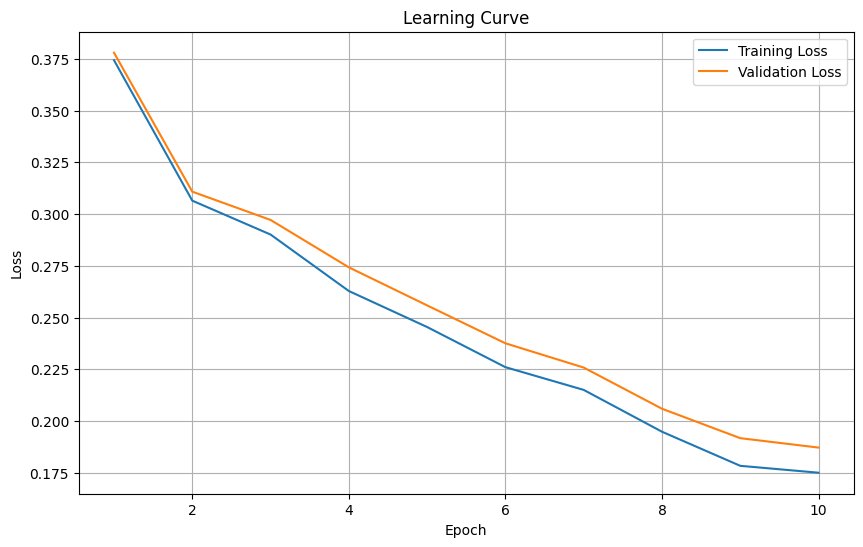


Test Accuracy: 0.9432

Sample predictions:
True: 2, Predicted: 2
True: 2, Predicted: 2
True: 1, Predicted: 1
True: 4, Predicted: 4
True: 1, Predicted: 1


In [10]:
import matplotlib.pyplot as plt

class ScratchSimpleNeuralNetworkClassifier():
    """3-layer neural network for MNIST classification with learning curve tracking"""

    def __init__(self, hidden_size=400, learning_rate=0.1, epochs=10, batch_size=20, verbose=True):
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.params = {}
        self.train_loss_history = []
        self.val_loss_history = []

    def _initialize_parameters(self, input_size, output_size):
        """Initialize weights and biases"""
        self.params['W1'] = np.random.randn(input_size, self.hidden_size) * 0.01
        self.params['b1'] = np.zeros(self.hidden_size)
        self.params['W2'] = np.random.randn(self.hidden_size, output_size) * 0.01
        self.params['b2'] = np.zeros(output_size)

    def _sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        """Derivative of sigmoid"""
        s = self._sigmoid(x)
        return s * (1 - s)

    def _softmax(self, x):
        """Softmax activation function"""
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def _forward_propagation(self, X):
        """Perform forward pass"""
        cache = {}
        cache['A1'] = np.dot(X, self.params['W1']) + self.params['b1']
        cache['Z1'] = self._sigmoid(cache['A1'])
        cache['A2'] = np.dot(cache['Z1'], self.params['W2']) + self.params['b2']
        cache['Z2'] = self._softmax(cache['A2'])
        return cache

    def _compute_loss(self, y_pred, y_true):
        """Compute cross-entropy loss"""
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[range(m), y_true.argmax(axis=1)])
        return np.sum(log_likelihood) / m

    def _backpropagation(self, X, y_true, cache):
        """Perform backward pass and update parameters"""
        m = X.shape[0]

        # Output layer gradient
        dA2 = (cache['Z2'] - y_true) / m
        dW2 = np.dot(cache['Z1'].T, dA2)
        db2 = np.sum(dA2, axis=0)

        # Hidden layer gradient
        dA1 = np.dot(dA2, self.params['W2'].T) * self._sigmoid_derivative(cache['A1'])
        dW1 = np.dot(X.T, dA1)
        db1 = np.sum(dA1, axis=0)

        # Update parameters
        self.params['W1'] -= self.learning_rate * dW1
        self.params['b1'] -= self.learning_rate * db1
        self.params['W2'] -= self.learning_rate * dW2
        self.params['b2'] -= self.learning_rate * db2

    def fit(self, X, y, X_val=None, y_val=None):
        """Train the neural network"""
        n_samples, n_features = X.shape
        n_classes = y.shape[1]
        self._initialize_parameters(n_features, n_classes)

        for epoch in range(self.epochs):
            # Shuffle and create mini-batches
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                # Forward and backward pass
                cache = self._forward_propagation(X_batch)
                self._backpropagation(X_batch, y_batch, cache)

            # Calculate and store losses
            train_loss = self._compute_loss(self._forward_propagation(X)['Z2'], y)
            self.train_loss_history.append(train_loss)

            if X_val is not None:
                val_loss = self._compute_loss(self._forward_propagation(X_val)['Z2'], y_val)
                self.val_loss_history.append(val_loss)

            # Print training progress
            if self.verbose:
                msg = f"Epoch {epoch+1}/{self.epochs}, Train Loss: {train_loss:.4f}"
                if X_val is not None:
                    msg += f", Val Loss: {val_loss:.4f}"
                print(msg)

    def predict(self, X):
        """Make predictions"""
        return np.argmax(self._forward_propagation(X)['Z2'], axis=1)

    def accuracy(self, X, y):
        """Calculate accuracy"""
        y_pred = self.predict(X)
        return accuracy_score(np.argmax(y, axis=1), y_pred)

    def plot_learning_curve(self):
        """Plot the training and validation loss curves"""
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, self.epochs+1), self.train_loss_history, label='Training Loss')
        if self.val_loss_history:
            plt.plot(range(1, self.epochs+1), self.val_loss_history, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Learning Curve')
        plt.legend()
        plt.grid(True)
        plt.show()

# Load and prepare MNIST data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(np.int32)

# One-hot encode labels
enc = OneHotEncoder(sparse_output=False)
y_onehot = enc.fit_transform(y.reshape(-1, 1))

# Split into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

# Create and train neural network
nn = ScratchSimpleNeuralNetworkClassifier(hidden_size=400, learning_rate=0.1,
                                         epochs=10, batch_size=32, verbose=True)
nn.fit(X_train, y_train, X_val, y_val)

# Plot the learning curve
nn.plot_learning_curve()

# Evaluate on test set
test_acc = nn.accuracy(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Example predictions
sample_indices = np.random.choice(len(X_test), 5)
sample_images = X_test[sample_indices]
sample_labels = np.argmax(y_test[sample_indices], axis=1)
predictions = nn.predict(sample_images)

print("\nSample predictions:")
for i in range(5):
    print(f"True: {sample_labels[i]}, Predicted: {predictions[i]}")


### Key Changes Made:

1. Added two new instance variables to track losses:
   - `self.train_loss_history`: Stores training loss after each epoch
   - `self.val_loss_history`: Stores validation loss after each epoch

2. Modified the `fit` method to:
   - Record training loss for each epoch
   - Record validation loss for each epoch (if validation data is provided)

3. Added a new method `plot_learning_curve()` that:
   - Creates a plot with epoch numbers on the x-axis
   - Plots both training and validation loss curves
   - Adds appropriate labels, title, and legend
   - Displays the plot using matplotlib

The learning curve will help you visualize:
- Whether the model is learning (loss decreasing over time)
- Whether the model is overfitting (training loss keeps decreasing while validation loss starts increasing)
- The point where additional training might not be beneficial (when validation loss plateaus)

This visualization is crucial for understanding the model's behavior and making decisions about training duration and model architecture.

###Problem 8 (Advance Assignment) Confirmation of Misclassification

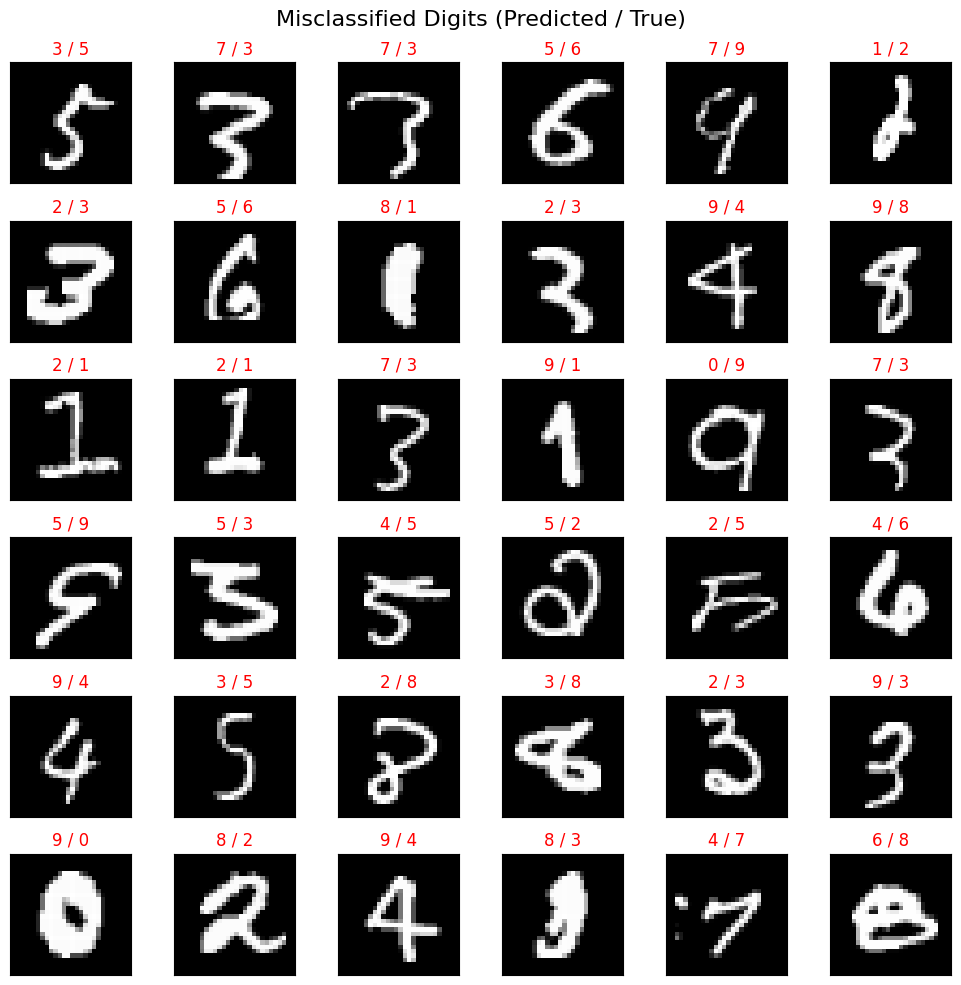

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def display_misclassified(y_pred, y_true, X_data, num=36):
    """
    Display misclassified images side by side.
    The display above each image shows "predicted / true" labels.

    Parameters:
    ----------
    y_pred : Predicted labels (n_samples,)
    y_true : True labels (n_samples,)
    X_data : Input data (n_samples, n_features)
    num : Maximum number of images to display (default: 36)
    """
    # Convert one-hot encoded y_true to class labels if needed
    if y_true.ndim > 1:
        y_true = np.argmax(y_true, axis=1)

    # Find misclassified samples
    misclassified = y_pred != y_true
    misclassified_indices = np.where(misclassified)[0]

    # Limit number of samples to display
    if len(misclassified_indices) < num:
        num = len(misclassified_indices)
        print(f"Only {num} misclassified samples found.")

    # Create figure
    rows = int(np.ceil(np.sqrt(num)))
    cols = int(np.ceil(num / rows))

    fig = plt.figure(figsize=(10, 10))
    fig.suptitle('Misclassified Digits (Predicted / True)', fontsize=16)

    for i, idx in enumerate(misclassified_indices[:num]):
        ax = fig.add_subplot(rows, cols, i + 1, xticks=[], yticks=[])
        ax.set_title(f"{y_pred[idx]} / {y_true[idx]}", color='red')
        ax.imshow(X_data[idx].reshape(28, 28), cmap='gray')

    plt.tight_layout()
    plt.show()

# Load and prepare MNIST data (if not already loaded)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(np.int32)

# One-hot encode labels (if not already done)
enc = OneHotEncoder(sparse_output=False)
y_onehot = enc.fit_transform(y.reshape(-1, 1))

# Split into train, validation and test sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

# Get predictions for validation set
y_pred_val = nn.predict(X_val)
y_true_val = np.argmax(y_val, axis=1)  # Convert one-hot to class labels

# Display misclassified images
display_misclassified(y_pred_val, y_true_val, X_val, num=36)

### Key Features of the Implementation:

1. **Flexible Input Handling**:
   - Works with both one-hot encoded and direct class labels
   - Automatically converts one-hot encoded labels if needed

2. **Intelligent Display Layout**:
   - Calculates optimal grid layout based on number of images to display
   - Adjusts figure size dynamically

3. **Clear Visualization**:
   - Shows predicted vs true labels in red for emphasis
   - Maintains original 28x28 pixel dimensions of MNIST digits
   - Removes axis ticks for cleaner display

4. **Error Handling**:
   - Automatically adjusts if there are fewer misclassified samples than requested
   - Provides feedback about number of misclassified samples found

5. **Reusable Function**:
   - Can be used with any dataset that has similar structure to MNIST
   - Works with any classifier that outputs predictions

## How to Use:

1. First train your neural network as before
2. Get predictions on your validation/test set
3. Call `display_misclassified()` with:
   - Your predictions
   - True labels
   - The corresponding images
   - (Optional) number of misclassified images to display

This visualization will help you:
- Identify common patterns in misclassifications
- Spot digits that are frequently confused
- Understand the model's weaknesses
- Potentially identify data quality issues (poorly written digits)

The function can be easily adapted for other image classification tasks by adjusting the image reshaping dimensions (currently set for 28x28 MNIST digits).